## Analyze A/B Test Results

This project serves to master the subjects covered in the statistics lessons Using an A/B Webpage Test. 

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to **help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.**

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [297]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.

a. Read in the dataset and take a look at the top few rows here:

In [300]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [303]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [306]:
df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

d. The proportion of users converted.

In [309]:
# Number of users converted
num_conv = df['converted'][df['converted'] == True].count()

# Number of ALl users in the 'converted' column (converted and not)
denomenator = df['converted'].count()

# Calculation of Probability of a converting case
num_conv/denomenator

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [312]:
df[
(df['group'] == 'treatment') == (df['landing_page'] != 'new_page')

].count()
#3893 users from the experiment didn't see the New Webpage 
#(we are not sure if they saw it or  not, so we dismiss these data to increase accuracy of our conclusion)

user_id         3893
timestamp       3893
group           3893
landing_page    3893
converted       3893
dtype: int64

f. Do any of the rows have missing values?

In [315]:
df.isna().sum()
#No

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page. Removing thesee increases the accuracy of the resul  

a. Create a new dataset that meets the specifications.  Store your new dataframe in **df2**.

In [318]:
df2 = df
df2 = df2[(((df2['group'] == 'treatment') & (df2['landing_page'] == 'new_page')) | 
        ((df2['group'] == 'control') & (df2['landing_page'] == 'old_page')))]
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [320]:
# Double Checking all of the correct rows were removed

df2[((df2['group'] == 'treatment') == (df2['landing_page'] != 'new_page'))].count()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`3.` Use **df2** and the cells below to answer questions below.

a. How many unique **user_id**s are in **df2**?

In [324]:
df2.nunique()
#It is the same number of the IDs
#But  timestamps entries are reduced by aprox.: 44.000 entry data (faulty data removed!)

user_id         290584
timestamp       290585
group                2
landing_page         2
converted            2
dtype: int64

b. There is one **user_id** repeated in **df2**.  What is it?

In [327]:
df2[(df2.user_id.duplicated()) == True]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [330]:
#displaying all duplicate IDs
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [333]:
df2.drop(2893, inplace = True)

C:\Users\fares\AppData\Local\Temp\ipykernel_32268\576326008.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(2893, inplace = True)


In [335]:
#Double check of removal
df2[df2['user_id'] == 773192] 

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


`4.` Use **df2** in the below cells to answer the  questions below.

a. What is the probability of an individual converting regardless of the page they receive?

In [338]:
# Number of users converted
num_conv = df2['converted'][df2['converted'] == 1].count()

# Number of ALl users in the 'converted' column (converted and not)
denomenator = df2['converted'].count()

# Calculation of Probability of a converting case
num_conv/denomenator

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [341]:
# Number of success outcome
numerator = df2[df2['group'] == 'control']['converted'][df2['converted'] == 1].count()

# Number of ALl outcomes
denomenator = df2['converted'][df2['group'] == 'control'].count()

# Calculation of Probability
cont_conv = numerator/denomenator
cont_conv

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [344]:
# Number of success outcome
numerator = df2[df2['group'] == 'treatment']['converted'][df2['converted'] == 1].count()

# Number of ALl outcomes
denomenator = df2['converted'][df2['group'] == 'treatment'].count()

# Calculation of Probability
treat_conv = numerator/denomenator
treat_conv

0.11880806551510564

d. What is the probability that an individual received the new page?

In [347]:
# Number of success outcome
numerator = df2['landing_page'][df2['landing_page'] == 'new_page'].count()

# Number of ALl outcomes
denomenator = df2['landing_page'].count()

# Calculation of Probability
numerator/denomenator

0.5000619442226688

In [349]:
# Additional calculations:
obs_diff = treat_conv - cont_conv
obs_diff

-0.0015782389853555567

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

>**Your answer goes here.**

$\textbf{My Point of view:}$ 

It is hard to believe that the new page leads to more interactions, as the the actual difference in linklihood of converting above ($P_{treatment 
 }$ - $P_{control}$) is minus, which means that the new page has lower conversion rates on average.

Users also received the old and new landing pages at pretty much **the same rate (50%)**. Hence, it is more likly that, the **new page lowers/doesn't lead to more convertions** in this case.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you **could** technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts in with A/B tests in general.  


`1.` Consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**

$\textbf{$H_0$: Null Hypothesis}$

The old page is either equally or less effective than the new landing page. 

$$(H_0 \leq H_1)$$

$\textbf{$H_1$: Alternative Hypothesis}$


The new landing page is more effective than the old landing page. 
$$(H_0 < H_1)$$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>
<center>
$p_{new}$ = $p_{old}$ = $p_{population}$
</center>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  You can use **Material 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [358]:
# Calculating the probabilty using (Bootsstrapping and Sampling distribution)
sample_new = df2[df2['landing_page'] == 'new_page'].sample(200)

conversion_new = []

# Bootstrapping
for sample in range(10000):
    boot_sample = sample_new.sample(200, replace = True) # Bootstrapping using the boolean (replace new outcomes while True if they appeared before)
    conversion_new.append(boot_sample.converted.mean())

conversion_new = np.array(conversion_new) # Converting the sample to a Numpy array to apply further calculations
p_new = conversion_new.mean()
p_new

0.13991599999999998

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [361]:
# Bootsstrapping and Sampling distribution of the control group
sample_old = df2[df2['landing_page'] == 'old_page'].sample(200)

conversion_old = []

# Bootstrapping
for sample in range(10000):
    boot_sample = sample_old.sample(200, replace = True) # Bootstrapping using the boolean (replace new outcomes while True if they appeared before)
    conversion_old.append(boot_sample.converted.mean())

conversion_old = np.array(conversion_old) # Converting the sample to a Numpy array to apply further calculations
p_old = conversion_old.mean()
p_old

0.11525

c. What is $n_{new}$?

In [364]:
#  the number of individuals in the treatment group
df2[df2['landing_page'] == 'new_page'].shape[0]

145310

d. What is $n_{old}$?

In [367]:
#  the number of individuals in the control group
df2[df2['landing_page'] == 'old_page'].shape[0]

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [370]:
# Simulate a Sample for the treatment Group
new_page_simulation = np.random.choice([0, 1], 10000, p = [1-p_new, p_new])
new_page_converted = np.array(new_page_simulation)
p_new_simulation = new_page_converted.mean()
p_new_simulation

0.1414

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [373]:
# Simulate a Sample for the control Group
old_page_simulation = np.random.choice([0, 1], 10000, p = [1-p_old, p_old])
old_page_converted = np.array(old_page_simulation)
p_old_simulation = old_page_converted.mean()
p_old_simulation

0.114

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [376]:
obs_diff_simulation = p_new_simulation - p_old_simulation
obs_diff_simulation

0.027399999999999994

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [379]:
# Sampling distribution of the difference
p_diffs = []
sample_df1 = (df2[df2['landing_page'] == 'new_page']).sample(150)
sample_df2 = (df2[df2['landing_page'] == 'old_page']).sample(150)

for sample in range(10000):
    bootsample1 = sample_df1.sample(150, replace = True)
    new_mean = bootsample1.converted.mean()
    bootsample2 = sample_df2.sample(150, replace = True)
    old_mean = bootsample2.converted.mean()
    p_diffs.append(new_mean.mean() - old_mean.mean())
    
p_diffs = np.array(p_diffs)
p_diffs.mean()

-0.04003533333333333

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

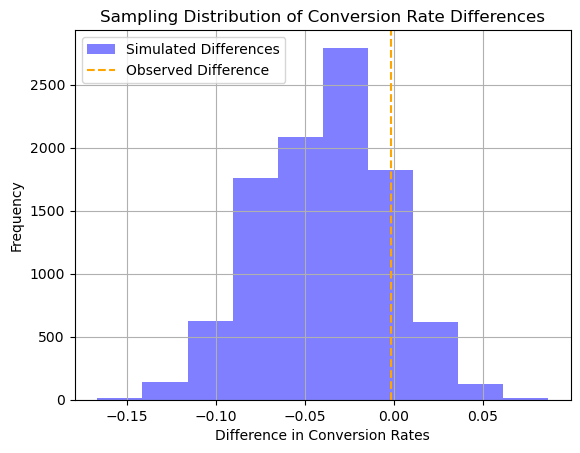

-0.04003533333333333
0.03525164891966836
0.0012426787515555555


In [420]:
plt.hist(p_diffs, alpha=0.5, color='blue', label='Simulated Differences')
p_diff_actual = obs_diff  # The actual observed difference from df2
plt.axvline(p_diff_actual, color='orange', linestyle='dashed', label='Observed Difference')

# Add labels and title
plt.xlabel('Difference in Conversion Rates')
plt.ylabel('Frequency')
plt.title('Sampling Distribution of Conversion Rate Differences')

plt.grid()
plt.legend()
plt.show()
print (p_diffs.mean())
print(p_diffs.std())
print(p_diffs.var())

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [390]:
(p_diffs > x).mean()

0.1488

k. In words, explain what you just computed in part **j.**  

>1. What is this value called in scientific studies? 

>2. What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Put your answer here.**

$\textbf{My Ans:}$


>$\textbf{1. What is this value called in scientific studies?}$
>>The null hypothesis (H₀) assumes that there is no difference in conversion rates between the new and old pages.
>>The alternative hypothesis (H₁) assumes that there is a difference in conversion rates.
<br><br>

>$\textbf{2. What does this value signify in terms of whether or not there is a difference between the new and old pages?}$
>>Compared the value above with the Type I error rate **(0.05)**, a high p-value (like 46.4%) means that the observed difference (0.0324) could easily have happened by random chance. <br><br>
>>We fail to reject the null hypothesis. This means there is not enough statistical evidence to conclude that the new page performs significantly better or worse than the old page.

$\textbf{Bootstrapping and Sampling Distribution Analysis}$

I first calculated the probability of conversion for both the new and old pages and computed their actual difference from the dataset. Then, I employed bootstrapping and the sampling distribution to estimate the differences, resulting in a normally distributed histogram with:

- **Mean**: -0.04
- **Standard deviation**: 0.035
- **P-value**: 0.1488

The p-value represents the probability of obtaining the observed difference, or a more extreme one, assuming the null hypothesis is true. Given that my p-value is significantly greater than 0.05, I **fail to reject the null hypothesis.** This suggests that any observed difference in conversion rates is likely due to random variation rather than a true effect. Therefore, I do not have sufficient statistical evidence to conclude that the new page outperforms the old one.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correct thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer to the number of rows associated with the old page and new pages, respectively.

In [394]:
import statsmodels.api as sm

convert_old = df2[df2['landing_page'] =='old_page']['converted'][df2['converted'] == 1].count()
convert_new = df2[df2['landing_page'] =='new_page']['converted'][df2['converted'] == 1].count()
n_old = (df2[df2['landing_page'] =='old_page'].count()).mean()
n_new = (df2[df2['landing_page'] =='new_page'].count()).mean()
print(convert_old, convert_new, n_old, n_new)

17489 17264 145274.0 145310.0


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [397]:
count = np.array([convert_old, convert_new])
nobs = np.array([n_old, n_new])
stats, p_value = sm.stats.proportions_ztest(count, nobs)

print('{0:0.4f}'.format(stats))
print('{0:0.4f}'.format(p_value))

1.3109
0.1899


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Put your answer here.**

$\textbf{Summary for New Webpage Conversion Rates using the Z-Test}$

In this analysis, I evaluated the effectiveness of a new webpage design compared to the existing one. My objective was to determine whether there is a statistically significant evidence in conversion rates.

$\textbf{Z-Test for Proportions}$

To further validate my findings, I computed the number of conversions and total individuals for each page:

- **Conversions (Old Page)**: `convert_old`
- **Conversions (New Page)**: `convert_new`
- **Total Users (Old Page)**: `n_old`
- **Total Users (New Page)**: `n_new`

Using the proportions Z-test, I obtained:

- **Test Statistic (Z)**: 1.3109
- **P-value**: 0.1899

The Z-score of 1.3109 indicates that the observed difference is only 1.31 standard deviations away from zero, which is not statistically significant (lower than 1.9). The p-value of 0.1899 is still greater than 0.05, leading me to **fail to reject the null** hypothesis again. 
Given that neither method provides strong evidence in favor of the new design, I conclude that switching to the **new page may not provide a meaningful improvement in conversion rates.**



<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.**

**Ans:** Logistic Regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [400]:
df2['intercept'] = 1
df2_dummies = pd.get_dummies(df2['group'])
df2_dummies['ab_page'] = df2_dummies['treatment'].astype(int)
df2_dummies = df2_dummies.drop(columns = ['control', 'treatment'], axis = 1)
df3 = df2.join(df2_dummies)
df3.head()


C:\Users\fares\AppData\Local\Temp\ipykernel_32268\2610793816.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['intercept'] = 1


,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [403]:
lm = sm.Logit(df3['converted'], df3[['intercept', 'ab_page']])
results = lm.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [406]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Method:           MLE        
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2025-02-25 17:12 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           LLR p-value:      0.18988    
No. Iterations:     6.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Put your answer here.**
$$
\textbf{Part II (Hypothesis Testing)}
$$

$$ H_0: p_{\text{new}} \leq p_{\text{old}} $$

$$ H_1: p_{\text{new}} > p_{\text{old}} $$

One-tailed test, leading to a higher p-value (**14.88%**).

---
$$ \textbf{Part III (Logistic Regression, Two-Sided Test)} $$

$$ H_0: \beta_{\text{ab\_page}} = 0 $$

$$ H_1: \beta_{\text{ab\_page}} \neq 0 $$

Two-tailed test, leading to a lower p-value (**18.99%**).

Since a two-sided test splits probability into both tails, it results in a different (lower) p-value compared to a one-sided test, where all probability is in one direction. However, in both cases, we **fail to reject** $H_0$ since the p-values are greater than 0.05.


f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Put your answer here.**

>$\textbf{Advantages:}$
>> Control for Confounding: Including extra predictors (such as age, gender,etc.) helps isolate the effect of your primary variable (e.g., page type) on conversion by reducing omitted variable bias.<br><br>
>>Increased Model Accuracy: More predictors may improve the fit of your model by explaining additional variance.<br><br>
>>Better Policy Insight: Understanding other factors that influence conversion can help tailor more effective marketing or design strategies. <br><br>


>$\textbf{Disadvantages:}$<br><br>
>>Overfitting: Adding too many predictors may tailor the model too closely to the sample data, reducing its ability to generalize to new data.<br><br>
>>**Multicollinearity**: New variables might be highly correlated with each other, but can be moderated if the data is suitable

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [252]:
countries_df = pd.read_csv('countries.csv')
df_new = countries_df.set_index('user_id').join(df3.set_index('user_id'), how='inner')
df_new.head()

array(['UK', 'US', 'CA'], dtype=object)

In [258]:
### Create the necessary dummy variables
countriess_dummy = pd.DataFrame()
df_new[['CA','UK','US']] = pd.get_dummies(df_new['country']).astype(int)
#df_new = df_new.drop(columns = ['other','UK','US'], axis = 1)
#df_new = df_new.join(countriess_dummy)
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [250]:
### Fit Your Linear Model And Obtain the Results
lm = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'UK','US']])
results = lm.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Method:           MLE        
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2025-02-25 16:18 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           LLR p-value:      0.17599    
No. Iterations:     6.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0300    0.0266  -76.2488  0.0000  -2.0822  -1.9778
ab_page       -0.0149    0.0114   -1.3069  0.1912  -0.0374   0.0075
UK             0.0506    0.0284    1.7835  0.0745  -0.0050   0.1063
US             0.0408    0.0269    1.5161  0.1295  -0.0119   0.0934
==================================================================

"""

$\textbf{My Conclusion}$

>Statistical Reasoning:
>>The p-values for ab_page, UK, and US are all greater than 0.05, meaning I fail to reject the null hypothesis for these variables.<br><br>
>>This suggests that neither the webpage version nor the country significantly impacts the conversion rate.
>>The interaction effects were not explicitly provided, so further analysis is required to determine if country modifies the effect of the webpage on conversion.<br><br>
>>The overall model does not explain much variance in conversion, as indicated by the low pseudo R-squared value.<br><br>
>>Multicollinearity & VIFs:<br><br>
>>VIF is not the best diagnostic tool for logistic regression due to its reliance on continuous predictors, but checking correlations between categorical variables can help assess potential multicollinearity issues.<br><br>
>>If high correlations exist between independent variables, removing one or combining categories may improve model interpretability.<br><br>

>Practical Implications:<br><br>
>>Since there is no statistically significant evidence that the new page improves conversions, I would not recommend rolling out the new design based on the current data.<br><br>
>>Additionally, the country does not appear to have a meaningful effect on conversion rates, implying that regional targeting may not be a strong factor in this case.<br><br>

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.